In [1]:
# DELIVERABLE FOR THE PROJECT:
# "KINEMATICS OF MOBILITY"
# David Pastor-Escuredo (LifeD Lab)
# Licencia MIT

In [2]:
#Copyright <2019> <David Pastor Escuredo>

#Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

#The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

#THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [3]:
import pandas as pd
import numpy as np
import json
from nltk.tokenize import word_tokenize
import re
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import collections
from sklearn.cluster import KMeans
from PIL import Image
import time
from datetime import datetime, timedelta, date
from os import listdir
from os.path import isfile, join
from geopandas import GeoDataFrame
from shapely.geometry import Point
import pickle
import math

%matplotlib inline

def getday(d):
    if d<10:
        ds='0'+str(d)
    else:
        ds=str(d)
    return ds

d_in_degree
88944
-0.03482142857142857
0.033928571428571426
87167
85396
(array([6]),)
d_out_degree
88944
-0.03705357142857143
0.035416666666666666
87169
85390
(array([6]),)
d_in_eigenvalue
88944
-0.0021850718112970593
0.0024925903462668284
87165
85386
(array([5]),)
d_out_eigenvalue
88944
-0.0024923469883607486
0.002771674940961922
87165
85387
(array([5]),)
d_in_betweenness
88944
-0.018060646197710542
0.01760543134814247
87165
85386
(array([6]),)
d_out_betweenness
88944
-0.018060646197710542
0.01760543134814247
87165
85386
(array([6]),)
d_dis_betweenness
88944
-0.17916984188480217
0.18245814168384697
87165
85387
(array([5]),)
d_cfbetweenness
88944
-0.004006649927799141
0.003869255142977418
87165
85386
(array([6]),)
d_in_closeness
88944
-0.16775533097162804
0.16806066914883475
87165
85386
(array([5]),)
d_out_closeness
88944
-0.18025382468507886
0.17588085319438823
87165
85386
(array([6]),)
d_dis_closeness
88944
-3.7013286073449523
3.2930966790874288
87165
85386
(array([6]),)
d_cfclosenes

ValueError: Axis limits cannot be NaN or Inf

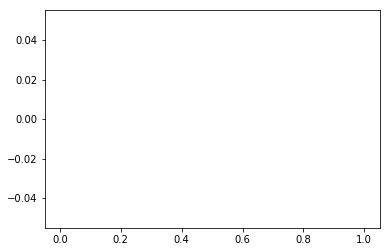

In [8]:
#Load the stats of each trajectory vector and make an histogram
region='_medellin'
desc=['d_cfbetweenness']
desc=['d_in_degree', 'd_out_degree','d_in_eigenvalue','d_out_eigenvalue',
       'd_in_betweenness','d_out_betweenness','d_dis_betweenness','d_cfbetweenness',
       'd_in_closeness','d_out_closeness','d_dis_closeness', 'd_cfcloseness', 
       'd_in_ave_flow','d_out_ave_flow',
       'd_in_std_flow','d_out_std_flow','d_in_ave_distance','d_out_ave_distance',
       'distance', 'flow', 'd_time']

ic=0
col=['darkkhaki','firebrick', 'navy', 'olive', 'purple']
stat=['mean','max', 'min', 'median', 'std']
datapath='/home/davidpastor/TEF_mob/'
netpath=datapath+'nets/'
netdescpath=datapath+'nets_desc/'
trajpath=datapath+'trajs/'
trajdesc=datapath+'traj_net/'


for ide in range(0,len(desc)):
      
    with open(trajdesc+'TVD'+'_'+desc[ide]+region+'_th1'+'.cnf', 'rb') as fpp:
        VD=pickle.load(fpp) 
    
    vector=[]
    for u in VD:
        vector.append(VD[u][stat[ic]])

    print(desc[ide])
    print(len(vector))

    plt.clf()
    limx1=np.percentile(vector,2)
    limx2=np.percentile(vector,98)
    print(limx1)
    print(limx2)
        
    v2=[x for x in vector if x>=limx1]
    print(len(v2))
    v3=[x for x in v2 if x<=limx2] 
    print(len(v3))
    
    n, b, patches=plt.hist(v3,bins=12,color=col[ic])

    bin_max= np.where(n == n.max())
    print(bin_max) 
    plt.xlim(limx1, limx2)
    plt.axvline(x=b[bin_max][0], color='k', linestyle='--')
    plt.xlabel(stat[ic]+" "+desc[ide])
    plt.ylabel("#people")   
    plt.savefig("Figs/TVD_"+stat[ic]+"_"+desc[ide]+region+'_th1'+".png")

d_in_degree
80667
-0.052303146258503394
0.04410714285714286
79053
77440
(array([6]),)
d_out_degree
80667
-0.055357142857142855
0.04642857142857143
79056
77449
(array([6]),)
d_in_eigenvalue
80667
-0.007649347915487742
0.009891376750211962
79053
77439
(array([5]),)
d_out_eigenvalue
80667
-0.008029613518006603
0.009969095741575722
79053
77439
(array([5]),)
d_in_betweenness
80667
-0.03146511415517543
0.024186093025235042
79053
77439
(array([6]),)
d_out_betweenness
80667
-0.03146511415517543
0.024186093025235042
79053
77439
(array([6]),)
d_dis_betweenness
80667
-0.3249902817327599
0.5696930680739872
79053
77439
(array([4]),)
d_cfbetweenness
80667
-0.005762043929137946
0.004870896257722731
79053
77439
(array([6]),)
d_in_closeness
80667
-0.2430448279694344
0.2661712843610547
79053
77439
(array([5]),)
d_out_closeness
80667
-0.25717562584558473
0.28062054008977255
79053
77439
(array([5]),)
d_dis_closeness
80667
-5.397212371170853
6.269919312438981
79053
77439
(array([5]),)
d_cfcloseness
80667
-

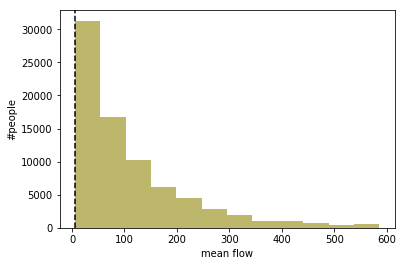

In [5]:
#Load the stats of each trajectory vector home-based and make an histogram
ide=0

region='_medellin'
desc=['d_cfbetweenness']
desc=['d_in_degree', 'd_out_degree','d_in_eigenvalue','d_out_eigenvalue',
       'd_in_betweenness','d_out_betweenness','d_dis_betweenness','d_cfbetweenness',
       'd_in_closeness','d_out_closeness','d_dis_closeness', 'd_cfcloseness', 
       'd_in_ave_flow','d_out_ave_flow',
       'd_in_std_flow','d_out_std_flow','d_in_ave_distance','d_out_ave_distance',
       'distance', 'flow']

ic=0
col=['darkkhaki','firebrick', 'navy', 'olive', 'purple']
stat=['mean','max', 'min', 'median', 'std']
datapath='/home/davidpastor/TEF_mob/'
netpath=datapath+'nets/'
netdescpath=datapath+'nets_desc/'
trajpath=datapath+'trajs/'
trajdesc=datapath+'traj_net/'

for ide in range(0,len(desc)):  
    
    with open(trajdesc+'THD'+'_'+desc[ide]+region+'_th1'+'.cnf', 'rb') as fpp:
        VD=pickle.load(fpp) 
    
    vector=[]
    for u in VD:
        vector.append(VD[u][stat[ic]])
    
    print(desc[ide])
    print(len(vector))

    plt.clf()
    limx1=np.percentile(vector,2)
    limx2=np.percentile(vector,98)
    print(limx1)
    print(limx2)
        
    v2=[x for x in vector if x>=limx1]
    print(len(v2))
    v3=[x for x in v2 if x<=limx2] 
    print(len(v3))
    
    n, b, patches=plt.hist(v3,bins=12,color=col[ic])
    
    bin_max= np.where(n == n.max())
    print(bin_max) 
    #plt.xlim(limx1, limx2)
    plt.axvline(x=b[bin_max][0], color='k', linestyle='--')
    plt.xlabel(stat[ic]+" "+desc[ide])
    plt.ylabel("#people") 
    plt.savefig("Figs/THD_"+stat[ic]+"_"+desc[ide]+region+'_th1'+".png")

ind
1694817
0.0
186.33333333333334
1694817
1660952
(array([0]),)
outd
1694817
0.0
182.0751648351645
1694817
1660920
(array([0]),)
in_degree
1694817
0.0
0.025333535097816686
1694817
1660920
(array([0]),)
out_degree
1694817
0.0
0.024765911249830373
1694817
1660922
(array([0]),)
in_eigenvalue
1694817
4.099920454927838e-233
0.001314654635885662
1694817
1660920
(array([0]),)
out_eigenvalue
1694817
1.01893017e-315
0.0012504995398105257
1694817
1660920
(array([0]),)
in_betweenness
1694817
0.0
0.009155883168033094
1694817
1660920
(array([0]),)
out_betweenness
1694817
0.0
0.009156545790183912
1694817
1660925
(array([0]),)
dis_betweenness
1694817
0.0
0.5056323986335451
1694817
1660920
(array([0]),)
cfbetweenness
1694817
-1.3168157110561015e-15
0.0022195844968107333
1694817
1660920
(array([0]),)
in_closeness
1694817
0.0
0.8991063906840592
1694817
1660920
(array([5]),)
out_closeness
1694817
0.0
0.885700853489647
1694817
1660920
(array([0]),)
dis_closeness
1694817
0.0847692248665936
1.4232103301926

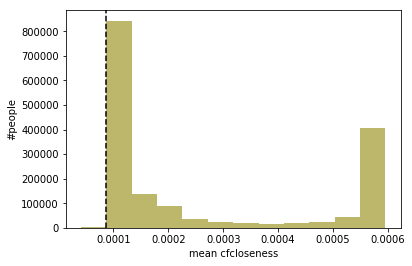

In [65]:
#Load the stats of each trajectory position and make an histogram
ide=0
desc=['cfbetweenness']
desc=['in_degree', 'out_degree','in_eigenvalue',
       'out_eigenvalue','in_betweenness','out_betweenness','dis_betweenness','cfbetweenness',
       'in_closeness','out_closeness','dis_closeness', 'cfcloseness','in_flow', 'out_flow', 'in_ave_flow','out_ave_flow',
       'in_std_flow','out_std_flow','in_ave_distance','out_ave_distance']
ic=0
col=['darkkhaki','firebrick', 'navy', 'olive', 'purple']
stat=['mean','max', 'min', 'median', 'std']
datapath='/home/davidpastor/TEF_mob/'
netpath=datapath+'nets/'
netdescpath=datapath+'nets_desc/'
trajpath=datapath+'trajs/'
trajdesc=datapath+'traj_net/'



for ide in range(0,len(desc)):
    
    with open(trajdesc+'TD'+'_'+desc[ide]+region+'.cnf', 'rb') as fpp:
        VD=pickle.load(fpp) 
    
    vector=[]
    for u in VD:
        vector.append(VD[u][stat[ic]])

    print(desc[ide])
    print(len(vector))

    plt.clf()
    limx1=np.percentile(vector,0)
    limx2=np.percentile(vector,98)
    print(limx1)
    print(limx2)
        
    v2=[x for x in vector if x>=limx1]
    print(len(v2))
    v3=[x for x in v2 if x<=limx2] 
    print(len(v3))
    
    n, b, patches=plt.hist(v3,bins=12,color=col[ic])

    bin_max= np.where(n == n.max())
    print(bin_max) 
    #plt.xlim(limx1, limx2)
    plt.axvline(x=b[bin_max][0], color='k', linestyle='--')
    plt.xlabel(stat[ic]+" "+desc[ide])
    plt.ylabel("#people")   
    plt.savefig("Figs/TD_"+stat[ic]+"_"+desc[ide]+region+".png")